# Parte 1

## Item a)

## Item b)

## Item c)

Utilizando o critério da máxima verossimilhança foi obtido um valor de x = |1,09|.

Utilizando o critério de máximo à posteriori foi obtido um valor de x = |0.38|.

# Parte 2 - Classificação Binária

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import inv
import operator

## Item a)

In [2]:
features = pd.read_csv('two_moons.csv', sep=',')


y_1 = features.loc[features["y"] == 1.0]
y_0 = features.loc[features["y"] == 0.0]

x_i = features.loc[:, 'x_1':'x_2']
#x_i.head()
x_i = np.array(x_i)
y_i = features.loc[:, 'y']
#y_i.head()
y_i = np.array(y_i)
y_i = np.reshape(y_i,(len(y_i), 1))
#print (y_i.shape)

features.head()


,Unnamed: 0,x_1,x_2,y
0,0,2.064430,0.546069,1.0
1,1,1.762473,-0.062689,1.0
2,2,-0.245490,1.068868,0.0
3,3,-0.174630,0.183882,1.0
4,4,0.452110,-0.406512,1.0


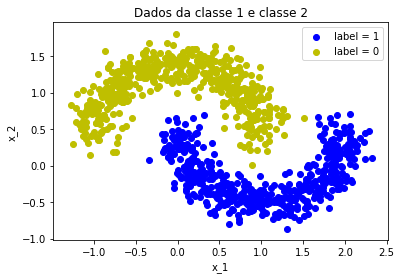

In [357]:
x_11 = y_1['x_1']
x_21 = y_1['x_2']
x_10 = y_0['x_1']
x_20 = y_0['x_2']

#plt.figure(figsize=(12,8))
plt.scatter(x_11,x_21, c='b', label='label = 1')
plt.scatter(x_10, x_20, c='y', label='label = 0')
plt.title('Dados da classe 1 e classe 2')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()


## Item b)

In [358]:
x_1 = y_1.loc[:, 'x_1':'x_2'].values
x_0 = y_0.loc[:, 'x_1':'x_2'].values

y1m = y_1.mean()
mu1_np = np.array(y1m)
mu1 = np.array(mu1_np[1:3])

y0m = y_0.mean()
mu0_np = np.array(y0m)
mu0 = np.array(mu0_np[1:3])

print ('Media da classe 1:', mu0)
print ('Media da classe 2:', mu1)
#print ((x_1[0:1]).shape)

Media da classe 1: [-0.00174703  1.03675024]
Media da classe 2: [ 1.00541181 -0.14052539]


In [359]:
def matrix_cov_class(x, mu):
    
    S = np.zeros((2,2))
    for i in range(len(x)-1):
        #print (x[i:i+1])
        #print (x_1[i], mu1)
        X = x[i:i+1] - mu
        #print (X)
        
        #print (X.shape)
        #print ((X.T).shape)
        s = np.dot(X.T, X)
        #print (s)
        S = S + s
        #print (S)
        #input()
    return S

In [360]:
Sw1 = matrix_cov_class(x_1, mu1)
Sw0 = matrix_cov_class(x_0, mu0)

#print (Sw1)
#print (Sw0)
Sw = Sw1 + Sw0
print ('Matrix de covariância intra-classe:', '\n', Sw)

Matrix de covariância intra-classe: 
 [[ 5.21455812e+02 -3.03126504e-01]
 [-3.03126504e-01  1.18819889e+02]]


In [361]:
d_mu = mu0 - mu1

w = np.dot(inv(Sw), d_mu) 
print ('Vetor de pesos (w): ', w)


Vetor de pesos (w):  [-0.00192568  0.00990316]


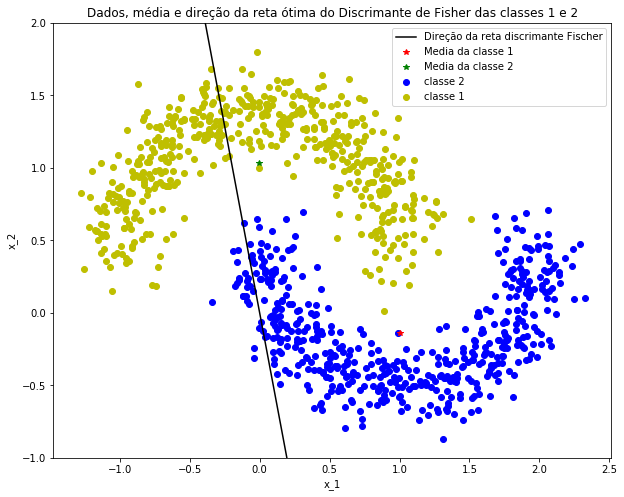

In [362]:
#print (mu0.shape)
t1 = range(-1, 3)

plt.figure(figsize=(10, 8))
plt.scatter(x_11, x_21, c='b', label='classe 2')
plt.scatter(x_10, x_20, c='y', label='classe 1')
#plt.scatter(w[0], w[1], c='k')
plt.plot(t1, (w[1]*t1)/w[0], 'k', label='Direção da reta discrimante Fischer')
#plt.scatter(mut[0], mut[1], c='k', marker='.')
plt.plot(mu1[0], mu1[1], '*r', label='Media da classe 1')
plt.plot(mu0[0], mu0[1], '*g', label='Media da classe 2')
plt.ylim(-1,2)
#plt.xlim(-2, 10)
plt.title('Dados, média e direção da reta ótima do Discrimante de Fisher das classes 1 e 2')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()


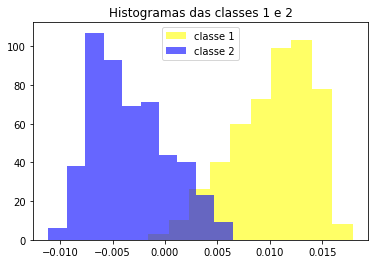

In [363]:
#classe 1
w = np.reshape(w, (w.shape[0], 1))

y1 = np.dot(x_1, w) #Maneira correta: y=w.T*x_1
#classe 2
y0 = np.dot(x_0, w)
#y1 = np.dot(w.T, x_1)
y_est_fischer = np.dot(x_i, w)

h0, bins0, p = plt.hist(y0, bins=10, facecolor='yellow', alpha=0.6, label='classe 1')
h1, bins1, p = plt.hist(y1, bins=10, facecolor='blue', alpha=0.6, label='classe 2')
plt.title('Histogramas das classes 1 e 2')
plt.legend()
plt.show()

#h, bins, p = plt.hist(y_est_fischer, bins=15, facecolor='green', alpha=0.6, label='label = 0')
#plt.show()

## Item c

Threshold Heuristica:  [0.00347136]


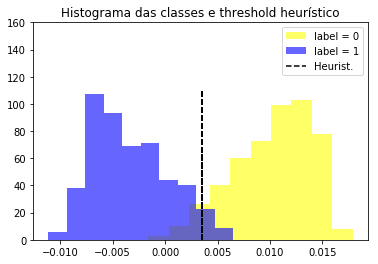

In [364]:
# Threshold Heuristica:
u1 = np.dot(w.T, mu1)
u0 = np.dot(w.T, mu0)
w0_h = (u1+u0)/2

#Threshold quadrados mínimos:
mut = (mu0+mu1)/2

w0_s = np.dot((-1*w).T, mut)

print ("Threshold Heuristica: ", w0_h)
#print ("Threshold quadrados mínimos: ", w0_s)

h0, bins0, p = plt.hist(y0, bins=10, facecolor='yellow', alpha=0.6, label='label = 0')
h1, bins1, p = plt.hist(y1, bins=10, facecolor='blue', alpha=0.6, label='label = 1')
#plt.plot(w0_s)#, range(120), '--r', label='Thr Sqmin.')
#plt.plot(w0_h)#, range(120), '-.k', label='Thr Heuris.')
#plt.vlines(np.ones((1, 110))*w0_s, 0.001, 110, color='r', linestyles='dashed', label='Quad.min.' )
plt.vlines(np.ones((1, 110))*w0_h, 0.001, 110, color='k', linestyles='dashed', label='Heurist.' )
plt.title('Histograma das classes e threshold heurístico')
plt.legend()
plt.ylim(0,160)
plt.show()



In [365]:
def hipotese_class(y, thre):
    hc = []
    for i in range(len(y)):
        if y[i] > thre:
            hc.append(0)
        else:
            hc.append(1)
    return hc

#Todas as classes:
y_est_fischer = np.dot(x_i, w)

#print (y_est_fischer)
y_est_heur = hipotese_class(y_est_fischer, w0_h)

#print (y_est_fischer)



In [366]:
def confusion_matrix(y_ver, y_est):
    tp = 0
    fn = 0
    fp = 0
    tn = 0
    for i in range(len(y_est)):
        if y_est[i] == 0 and y_ver[i] == 0:
            tp = tp + 1
        
        elif y_est[i] == 0 and y_ver[i] == 1:
            fp = fp + 1
        
        elif y_est[i] == 1 and y_ver[i] == 0:
            fn = fn + 1
        
        elif y_est[i] == 1 and y_ver[i] == 1:
            tn = tn + 1

    R = float(tp/(tp + fn))
    P = float(tp/(tp + fp))
    Pe = float(fp/(tn+fp))
    F1 = float(2*(float((R*P)/(R+P))))
    cm = np.array([[tp, fn], [fp, tn]])
        
    return R, P, Pe, F1,cm

In [367]:
Rfh, Pfh, Pefh, F1fh, cmfh = confusion_matrix(y_i, y_est_heur)

print (F1fh, Pefh)

0.9510489510489509 0.05


In [368]:
thresholds = np.arange(-0.01, 0.015, 0.001)
print (len(thresholds))
print (thresholds)

25
[-1.00000000e-02 -9.00000000e-03 -8.00000000e-03 -7.00000000e-03
 -6.00000000e-03 -5.00000000e-03 -4.00000000e-03 -3.00000000e-03
 -2.00000000e-03 -1.00000000e-03 -8.67361738e-18  1.00000000e-03
  2.00000000e-03  3.00000000e-03  4.00000000e-03  5.00000000e-03
  6.00000000e-03  7.00000000e-03  8.00000000e-03  9.00000000e-03
  1.00000000e-02  1.10000000e-02  1.20000000e-02  1.30000000e-02
  1.40000000e-02]


In [369]:
def Threshold_ROC(y, y_est, thresholds_list):
    Rf = []
    Pf = []
    Pef = []
    F1f = []
    for i in thresholds_list:
        hc = hipotese_class(y_est, i)
        #print (y_est_f)
        R, P, Pe, F1, cm = confusion_matrix(y, hc)
        Rf.append(R)
        Pf.append(P)
        Pef.append(Pe)
        F1f.append(F1)
    return Rf, Pf, Pef, F1f

In [370]:
Rf, Pf, Pef, F1f = Threshold_ROC(y_i, y_est_fischer, thresholds)
print (Pef)

[0.996, 0.972, 0.936, 0.846, 0.728, 0.592, 0.502, 0.424, 0.342, 0.266, 0.194, 0.146, 0.114, 0.06, 0.032, 0.012, 0.008, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


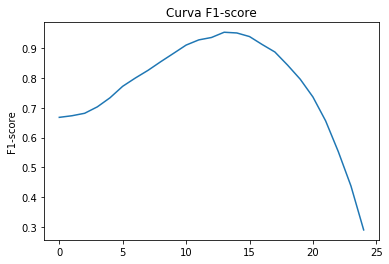

Maior valor de F1-score:  0.9525691699604742
Melhor valor do Threshold:  0.002999999999999989
Diferença entre o Melhor Threshold e o Heurístico: [0.00047136]


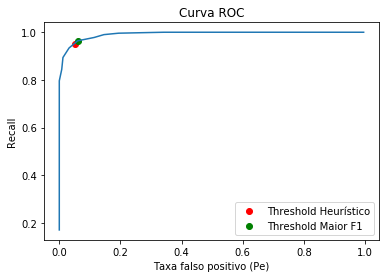

In [371]:
plt.plot(F1f)
plt.title('Curva F1-score')
plt.ylabel('F1-score')
#plt.xlabel('Thresholds')
plt.show()

arg_class = np.argmax(F1f)
print ("Maior valor de F1-score: ", F1f[arg_class])
print ("Melhor valor do Threshold: ", thresholds[arg_class])
#print ("Valor de Recall e Taxa de falso positivo para melhor classificador: ",
 #      Rf[arg_class], Pef[arg_class])
print ("Diferença entre o Melhor Threshold e o Heurístico:", w0_h - thresholds[arg_class])

plt.plot(Pef, Rf)
plt.scatter(Pefh, Rfh, color='r', label='Threshold Heurístico')
plt.scatter(Pef[arg_class], Rf[arg_class], color='g', label='Threshold Maior F1')
#plt.ylim(0.8, 1)
plt.title('Curva ROC')
plt.ylabel('Recall')
plt.xlabel('Taxa falso positivo (Pe)')
plt.legend()
plt.show()


## Item d)

In [372]:
def matrix_phi(x):
    one_i = np.ones((x.shape[0], 1))
    phi = np.concatenate((one_i, x), axis=1)
    return phi

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def logistic_function(y, y_e):
    #input()
    RL = -np.mean(y*np.log(y_e) + (1-y)*np.log(1-y_e))
    #print (RL)
    return RL

def Gradiente(x, y_ver, lr, num_ite):
    #lr = 0.05 #learning_rate
    phi = matrix_phi(x)
    
    n = phi.shape[1]
    wl = np.zeros((n,1))
    
    loss = []
    for epoch in range(num_ite):
        #input()
        Z = np.matmul(phi, wl)
        A = sigmoid(Z)
        #print ('A',A.shape)
        Jce = logistic_function(y_ver, A)
        #print ('y_i', y_i.shape)
        #print (Jce)
        loss.append(Jce)
        e = A - y_ver
        #print ('e', e.shape)
        dw = (1/len(y_ver)) * np.matmul(phi.T, e)
        #print ('dw', dw.shape)
        #s_e = sum(e)
        wl = wl - lr*dw #Obter o ultimo wl
        #b = b - lr*s_e
    return wl, loss


In [373]:
one_i = np.ones((x_i.shape[0], 1))
Fi = np.concatenate((one_i, x_i), axis=1)
lr = 0.02
num_ite = 3000

w_log , custo = Gradiente(x_i, y_i, lr, num_ite)

Pesos da função logística: 
 [[ 0.90815398]
 [ 1.17556953]
 [-3.72340073]]


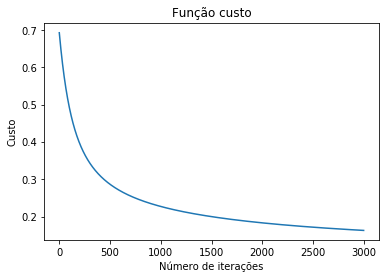

In [374]:
print ('Pesos da função logística: \n',  w_log)

plt.plot(custo)
plt.title(u'Função custo')
plt.xlabel(u'Número de iterações')
plt.ylabel('Custo')
#plt.xlim(0,100)
plt.show()
    

In [375]:
Z_i = np.dot(Fi, w_log)
#Z_i = np.dot(x_i, wl)+b

y_est_l = sigmoid(Z_i)

print (min(y_est_l), max(y_est_l))

[0.00249365] [0.99660964]


In [376]:
def hipotese_class_log(y, thre):
    hc = []
    for i in range(len(y)):
        if y[i] > thre:
            hc.append(1)
        else:
            hc.append(0)
    return hc

hci = hipotese_class_log(y_est_l, 0.5)
#print (len(hc))

#Rl, Pl, Pel, F1l = Threshold_ROC_log(y_i, y_est_l, 0.5)

Ri, Pi, Pei, F1i, cmi = confusion_matrix(y_i, hci)

print (F1i, Pei)

0.937007874015748 0.08


In [377]:
def Threshold_ROC_log(y, y_est, thresholds_list):
    Rf = []
    Pf = []
    Pef = []
    F1f = []
    for i in thresholds_list:
        hc = hipotese_class_log(y_est, i)
        #print (hc)
        R, P, Pe, F1, cm = confusion_matrix(y, hc)
        #input()
        #print (cm)
        Rf.append(R)
        Pf.append(P)
        Pef.append(Pe)
        F1f.append(F1)
    return Rf, Pf, Pef, F1f

In [378]:
thresholds_l = np.arange(0.02, 1, 0.01)
print (len(thresholds_l))
print (thresholds_l)

98
[0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15
 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43
 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57
 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71
 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85
 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]


In [379]:
Rl, Pl, Pel, F1l = Threshold_ROC_log(y_i, y_est_l, thresholds_l)
print (Pel)
#print (Rl)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004, 0.004, 0.004, 0.004, 0.01, 0.01, 0.01, 0.012, 0.012, 0.012, 0.012, 0.018, 0.02, 0.02, 0.022, 0.024, 0.026, 0.028, 0.034, 0.036, 0.04, 0.046, 0.048, 0.05, 0.05, 0.054, 0.056, 0.056, 0.056, 0.064, 0.068, 0.076, 0.08, 0.086, 0.09, 0.092, 0.096, 0.102, 0.106, 0.112, 0.116, 0.122, 0.124, 0.124, 0.128, 0.128, 0.128, 0.136, 0.136, 0.14, 0.14, 0.148, 0.15, 0.152, 0.156, 0.162, 0.164, 0.174, 0.174, 0.186, 0.19, 0.198, 0.208, 0.22, 0.234, 0.244, 0.252, 0.264, 0.28, 0.294, 0.316, 0.338, 0.354, 0.372, 0.39, 0.42, 0.468, 0.514, 0.564, 0.644, 0.77, 0.942]


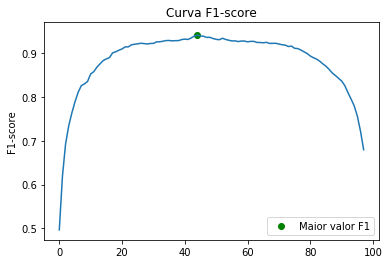

Maior valor de F1-score:  0.9418837675350701
Melhor valor do Threshold:  0.45999999999999996


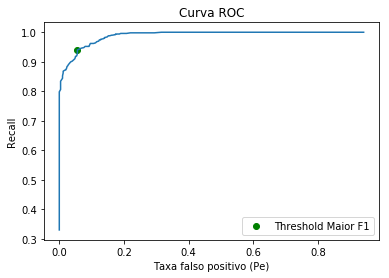

In [380]:
arg_l = np.argmax(F1l)

plt.plot(F1l)
plt.scatter(arg_l, F1l[arg_l], color='g', label='Maior valor F1')
plt.title('Curva F1-score')
plt.ylabel('F1-score')
#plt.xlabel('Thresholds')
plt.legend()
plt.show()

print ("Maior valor de F1-score: ", F1l[arg_l])
print ("Melhor valor do Threshold: ", thresholds_l[arg_l])

plt.plot(Pel, Rl)
#plt.scatter(Pefh, Rfh, color='r', label='Threshold Heurístico')
plt.scatter(Pel[arg_l], Rl[arg_l], color='g', label='Threshold Maior F1')
#plt.ylim(0.8, 1)
plt.title('Curva ROC')
plt.ylabel('Recall')
plt.xlabel('Taxa falso positivo (Pe)')
plt.legend()
plt.show()

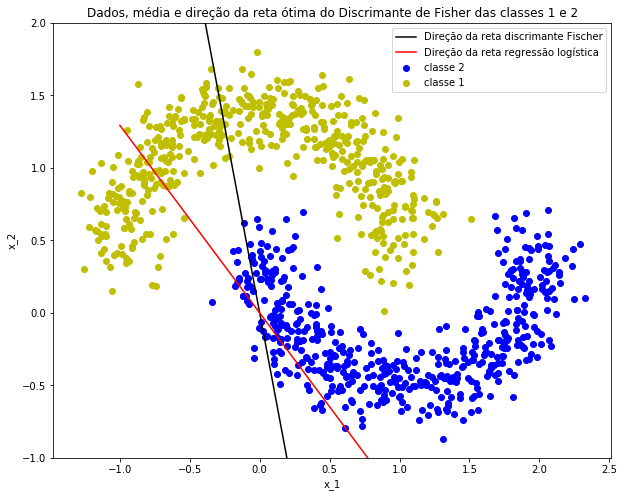

In [614]:
t1 = range(-1, 3)

plt.figure(figsize=(10, 8))
plt.scatter(x_11, x_21, c='b', label='classe 2')
plt.scatter(x_10, x_20, c='y', label='classe 1')
#plt.scatter(w[0], w[1], c='k')
plt.plot(t1, (w[1]*t1)/w[0], 'k', label='Direção da reta discrimante Fischer')
plt.plot(t1, (-(w_log[1]*t1)/w_log[0]), 'r', label='Direção da reta regressão logística')
#plt.scatter(mut[0], mut[1], c='k', marker='.')
#plt.plot(mu1[0], mu1[1], '*r', label='Media da classe 1')
#plt.plot(mu0[0], mu0[1], '*g', label='Media da classe 2')
plt.ylim(-1,2)
#plt.xlim(-2, 10)
plt.title('Dados, média e direção da reta ótima do Discrimante de Fisher das classes 1 e 2')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()

# Parte 3 - Classificação Multi-classe

## Item a)

In [489]:
auto = pd.read_csv('dataset_vehicle.csv')
auto.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [383]:
def one_hot_encoding(labels):
    #l = np.zeros((len(labels)))
    l = []
    for i in range(len(labels)):
        if labels[i] == 'bus':
            #l[i] = [0, 0]
            l.append([0, 0])
        elif labels[i] == 'van':
            #l[i] = [0, 1]
            l.append([0, 1])
        elif labels[i] == 'opel':
            #l[i] = [1, 0]
            l.append([1, 0])
        elif labels[i] == 'saab':
            #l[i] = [1, 1]
            l.append([1, 1])
    return l

#y_enc = one_hot_encoding(y)

#np.array(y_enc)


In [384]:
#normalização dos dados:

def normalize(xi):
    mu = np.mean(xi) #media 0 e variancia 1
    sig = np.std(xi)
    #mu = np.zeros((1, xi.shape[1]))
    #sig = np.ones((1, xi.shape[1]))
    x_norm = np.zeros((xi.shape[0], xi.shape[1]))
    for i in range(len(xi)):
        x_norm[i] = (mu - x[i])/sig
    return x_norm

#x_n = normalize(x)


In [385]:
x = auto.loc[:, 'COMPACTNESS':'HOLLOWS_RATIO'].values
y = auto.loc[:, 'Class'].values

bus = auto.loc[auto['Class']=='bus'] #(218, 19)
x_bus = normalize(bus.loc[:, 'COMPACTNESS':'HOLLOWS_RATIO'].values)
y_bus = bus.loc[:, 'Class'].values
y_b = one_hot_encoding(y_bus)

van = auto.loc[auto['Class']=='van']
x_van = normalize(van.loc[:, 'COMPACTNESS':'HOLLOWS_RATIO'].values)
y_van = van.loc[:, 'Class'].values
y_v = one_hot_encoding(y_van)

opel = auto.loc[auto['Class']=='opel']
x_opel = normalize(opel.loc[:, 'COMPACTNESS':'HOLLOWS_RATIO'].values)
y_opel = opel.loc[:, 'Class'].values
y_o = one_hot_encoding(y_opel)

saab = auto.loc[auto['Class']=='saab']
x_saab = normalize(saab.loc[:, 'COMPACTNESS':'HOLLOWS_RATIO'].values)
y_saab = saab.loc[:, 'Class'].values
y_s = one_hot_encoding(y_saab)

print ('bus:', bus.shape, 'van:', van.shape, 'opel', opel.shape, 'saab:', saab.shape)
print ('bus:', len(y_bus), 'van:', len(y_van), 'opel', len(y_opel), 'saab:', len(y_saab))

bus: (218, 19) van: (199, 19) opel (212, 19) saab: (217, 19)
bus: 218 van: 199 opel 212 saab: 217


In [386]:
def Train_test(X, Y, t): #t = porcentagem de separação dos dados.
    N = len(Y)
    g = int(round(N*t, -1))

    perm = np.random.permutation(N)

    x_train, x_test = X[perm][g:], X[perm][:g]
    y_train, y_test = Y[perm][g:], Y[perm][:g]

    return (x_train, x_test, y_train, y_test)
#print (x.shape)
#print (x_train.shape, x_test.shape)
#print (y_train.shape, y_test.shape)

In [387]:
# Nesse caso foi utilizado 80% treino e 20% teste
x_train_bus, x_test_bus, y_train_bus, y_test_bus = Train_test(x_bus, y_bus, 0.2)
x_train_van, x_test_van, y_train_van, y_test_van = Train_test(x_van, y_van, 0.2)
x_train_opel, x_test_opel, y_train_opel, y_test_opel = Train_test(x_opel, y_opel, 0.2)
x_train_saab, x_test_saab, y_train_saab, y_test_saab = Train_test(x_saab, y_saab, 0.2)

#print (x_train_van.shape, x_test_van.shape, y_train_van.shape, y_test_van.shape)

def One_encoding(label):
    y_t = []
    #print ('label[0]:', label[0])
    #y_b = np.zeros((len(y2)))
    for i in range(len(label)):
        if label[0] == label[i]:
            y_t.append(1)
        else:
            y_t.append(0)
    return np.array(y_t)

def binary_classify(Xtr_a, Xte_a, Ytr_a, Yte_a, Xtr_b, Xte_b, Ytr_b, Yte_b):
    x_train_ab = np.vstack([Xtr_a, Xtr_b])
    x_test_ab = np.vstack([Xte_a, Xte_b])
    y_train_a_b = np.concatenate([Ytr_a, Ytr_b])
    y_test_a_b = np.concatenate([Yte_a, Yte_b])

    y_train_ab = One_encoding(y_train_a_b)
    y_train_ab = np.reshape(y_train_ab, (-1,1))

    y_test_ab = One_encoding(y_test_a_b)
    y_test_ab = np.reshape(y_test_ab, (-1,1))
    return x_train_ab, x_test_ab, y_train_ab, y_test_ab


In [388]:
#Classificador 1 - bus e van
x_train_bv, x_test_bv, y_train_bv, y_test_bv = binary_classify(x_train_bus, x_test_bus, y_train_bus, 
                                                               y_test_bus, x_train_van, x_test_van, 
                                                               y_train_van, y_test_van)
#Classificador 2 - bus  e saab
x_train_bs, x_test_bs, y_train_bs, y_test_bs = binary_classify(x_train_bus, x_test_bus, y_train_bus, 
                                                               y_test_bus, x_train_saab, x_test_saab, 
                                                               y_train_saab, y_test_saab)
#Classificador 3 - bus e opel
x_train_bo, x_test_bo, y_train_bo, y_test_bo = binary_classify(x_train_bus, x_test_bus, y_train_bus, 
                                                               y_test_bus,x_train_opel, x_test_opel,
                                                               y_train_opel, y_test_opel)
#Classificador 4 - van e opel
x_train_vo, x_test_vo, y_train_vo, y_test_vo = binary_classify(x_train_van, x_test_van, y_train_van,
                                                               y_test_van, x_train_opel, x_test_opel,
                                                               y_train_opel, y_test_opel)
#Classificador 5 - van e saab
x_train_vs, x_test_vs, y_train_vs, y_test_vs = binary_classify(x_train_van, x_test_van, y_train_van,
                                                               y_test_van,x_train_saab, x_test_saab, 
                                                               y_train_saab, y_test_saab)
#Classificador 6 - saab e opel
x_train_so, x_test_so, y_train_so, y_test_so = binary_classify(x_train_saab, x_test_saab, y_train_saab,
                                                               y_test_saab, x_train_opel, x_test_opel,
                                                               y_train_opel, y_test_opel)

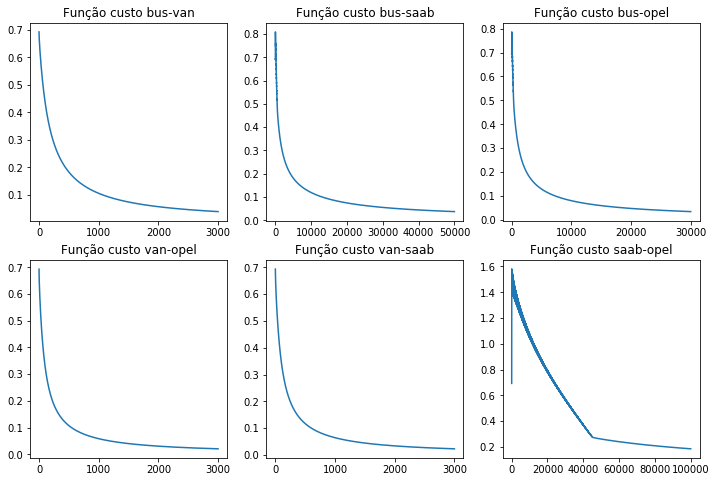

In [389]:
w_bv , loss_bv = Gradiente(x_train_bv, y_train_bv, 0.2, 3000)
w_bs , loss_bs = Gradiente(x_train_bs, y_train_bs, 0.6, 50000)
w_bo , loss_bo = Gradiente(x_train_bo, y_train_bo, 0.6, 30000)
w_vo , loss_vo = Gradiente(x_train_vo, y_train_vo, 0.2, 3000)
w_vs , loss_vs = Gradiente(x_train_vs, y_train_vs, 0.2, 3000)
w_so , loss_so = Gradiente(x_train_so, y_train_so, 0.99, 100000)

#print (w_bv.shape)
#print (w_bv)
#print ('Pesos da função logística: \n',  w_log)

fig, ax = plt.subplots(2,3, figsize=(12,8))
ax[0][0].plot(loss_bv)
ax[0][0].set_title(u'Função custo bus-van')
ax[0][1].plot(loss_bs)
ax[0][1].set_title(u'Função custo bus-saab')
ax[0][2].plot(loss_bo)
ax[0][2].set_title(u'Função custo bus-opel')
ax[1][0].plot(loss_vo)
ax[1][0].set_title(u'Função custo van-opel')
ax[1][1].plot(loss_vs)
ax[1][1].set_title(u'Função custo van-saab')
ax[1][2].plot(loss_so)
ax[1][2].set_title(u'Função custo saab-opel')
#plt.xlabel(u'Número de iterações')
#plt.ylabel('Custo')
#plt.ylim(0,1)
plt.show()
    

In [390]:
def one_hot_encoding_hipotese(labels, label1, label2):
    #l = np.zeros((len(labels)))
    l = []
    for i in range(len(labels)):
        if labels[i] > 0.5:
            l.append(label1)
        else:
            l.append(label2)
    return l

In [391]:
def one_vs_one(X_test, W, label1, label2):
    #Y_test_encoding = one_hot_encoding(Y_test)
    y_est_ab = estimativas(X_test, W)
    y_pred = one_hot_encoding_hipotese(y_est_ab, label1, label2)
    return y_pred

In [392]:
def estimativas(X_test, W):
    phi_test = matrix_phi(X_test)

    Z = np.dot(phi_test, W)
        
    Y_est = sigmoid(Z)
    return Y_est

x_test_total = np.vstack([np.vstack([np.vstack([x_test_bus, x_test_van]), x_test_opel]), x_test_saab])
y_test_total = np.concatenate((np.concatenate((np.concatenate((y_test_bus, y_test_van)), y_test_opel)), y_test_saab))

In [393]:
y_test_true = one_hot_encoding(y_test_total)
print (len(y_test_true))
#print (y_test_true)

y_est_bv = one_vs_one(x_test_total, w_bv, [0,0], [0,1])
y_est_bs = one_vs_one(x_test_total, w_bs, [0,0], [1,1])
y_est_bo = one_vs_one(x_test_total, w_bo, [0,0], [1,0])
y_est_vo = one_vs_one(x_test_total, w_vo, [0,1], [1,0])
y_est_vs = one_vs_one(x_test_total, w_vs, [0,1], [1,1])
y_est_so = one_vs_one(x_test_total, w_so, [1,1], [1,0])

#print (y_est_bv)

160


In [394]:
def cm_multiclass(y_true, y_pred):
    c = np.zeros((4,4))
    for i in range(len(y_true)):
        #for j in y_pred:
        #input()
        #print (y_true[i])
        if y_true[i] == [0,0]:
            if y_pred[i] == [0,0]:
                c[0][0] = c[0][0]+1
            elif y_pred[i] == [0,1]:
                c[0][1] = c[0][1]+1
            elif y_pred[i] == [1,0]:
                c[0][2] = c[0][2]+1
            elif y_pred[i] == [1,1]:
                c[0][3] = c[0][3]+1
        elif y_true[i] ==[0,1]:
            if y_pred[i] == [0,0]:
                c[1][0] = c[1][0]+1
            elif y_pred[i] == [0,1]:
                c[1][1] = c[1][1]+1
            elif y_pred[i] == [1,0]:
                c[1][2] = c[1][2]+1
            elif y_pred[i] == [1,1]:
                c[1][3] = c[1][3]+1           
        elif y_true[i] ==[1,0]:
            if y_pred[i] == [0,0]:
                c[2][0] = c[2][0]+1
            elif y_pred[i] == [0,1]:
                c[2][1] = c[2][1]+1
            elif y_pred[i] == [1,0]:
                c[2][2] = c[2][2]+1
            elif y_pred[i] == [1,1]:
                c[2][3] = c[2][3]+1
        elif y_true[i] ==[1,1]:
            if y_pred[i] == [0,0]:
                c[3][0] = c[2][0]+1
            elif y_pred[i] == [0,1]:
                c[3][1] = c[2][1]+1
            elif y_pred[i] == [1,0]:
                c[3][2] = c[2][2]+1
            elif y_pred[i] == [1,1]:
                c[3][3] = c[3][3]+1
    return c

In [395]:
cm_bv = cm_multiclass(y_test_true, y_est_bv)
cm_bs = cm_multiclass(y_test_true, y_est_bs)
cm_bo = cm_multiclass(y_test_true, y_est_bo)
cm_vo = cm_multiclass(y_test_true, y_est_vo)
cm_vs = cm_multiclass(y_test_true, y_est_vs)
cm_so = cm_multiclass(y_test_true, y_est_so)

cm_mean = (cm_bv + cm_bs + cm_bo + cm_vo + cm_vs + cm_so)/6
#cm_mean = cm_mean.round(2)
cm_mean = cm_mean.astype('int')
cm_mean

array([[20,  0,  6, 13],
       [13, 20,  0,  6],
       [ 6,  0, 19, 13],
       [ 7,  0, 20, 19]])

In [396]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira', fontsize=14)
    plt.xlabel('Classe estimada', fontsize=14)

    plt.figure(figsize=(12,12))
    #plt.show()

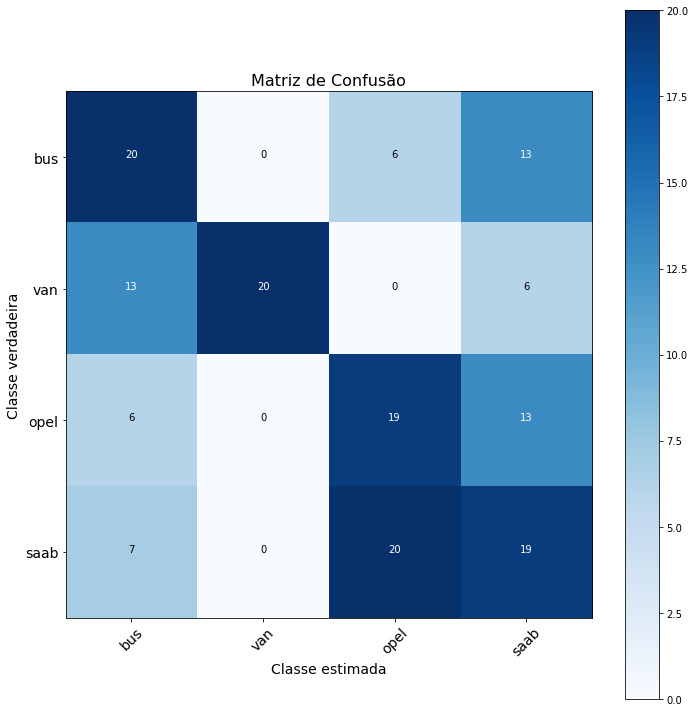

<Figure size 864x864 with 0 Axes>

In [397]:
# Un-Normalized Confusion Matrix...
plot_confusion_matrix(cm_mean, classes=['bus', 'van','opel', 'saab'], normalize=False,
                      title=u'Matriz de Confusão')
# Normalized Confusion Matrix...
#plot_confusion_matrix(cm_mean, classes=['bus', 'van','opel', 'saab'], normalize=True,
#                      title='Normalized Confusion Matrix')

In [398]:
print (cm_mean)

[[20  0  6 13]
 [13 20  0  6]
 [ 6  0 19 13]
 [ 7  0 20 19]]


In [455]:
def Metricas(cm):
    R_class = 0
    R_sum = []
    P_class = 0
    P_sum = []
    F1_class = 0
    F1_sum = []
    #tp = 0
    for i in range(cm.shape[0]):
        #tp = tp + cm[i][i]
        fn = 0
        fp = 0
        for j in range(0, cm.shape[1]):
            #input()
            fn = fn + cm[i][j]
            #print (fn)
            fp = fp + cm[j][i]
        #input()
        #fn = fn - cm[i][i]
        
        R_class = cm[i][i]/fn
        R_sum.append(R_class)
        
        P_class = cm[i][i]/fp
        P_sum.append(P_class)
        
        F1_class = 2*(float((R_class*P_class)/(R_class+P_class)))
        F1_sum.append(F1_class)
        
    R = np.mean(R_sum)
    print ('Recall para cada classe:\n', R_sum)
     
    P = np.mean(P_sum)
    print ('Precision para cada classe:\n', P_sum)
    
    F1 = np.mean(F1_sum)
    print ('F1-score para cada classe:\n', F1_sum, '\n')
    
    return R, P, F1

In [456]:
Ro, Po, F1o = Metricas(cm_mean)
print ('Média Recall:', Ro)
print ('Média Precision', Po)
print ('Média F1-score', F1o)

Recall para cada classe:
 [0.5128205128205128, 0.5128205128205128, 0.5, 0.41304347826086957]
Precision para cada classe:
 [0.43478260869565216, 1.0, 0.4222222222222222, 0.37254901960784315]
F1-score para cada classe:
 [0.47058823529411764, 0.6779661016949152, 0.4578313253012048, 0.39175257731958757] 

Média Recall: 0.4846711259754738
Média Precision 0.5573884626314294
Média F1-score 0.4995345599024563


## Item b) 

In [606]:
auto = pd.read_csv('dataset_vehicle.csv')
#auto.head()

In [607]:
x = auto.loc[:, 'COMPACTNESS':'HOLLOWS_RATIO'].values
y = auto.loc[:, 'Class'].values

# 80% treino e 20% teste
#x_train, x_test, y_train, y_test = Train_test(x, y, 0.2)
#print (x_train.shape, x_test.shape, y_train.shape)
#print (y_test)

In [600]:
#s = 0
#for i in range(len(y_test)):
#    if y_test[2] == y_test[i]:
#        s = s+1
#print (s)

In [608]:
auto = np.array(auto)

x_train, x_test, y_train, y_test = Train_test(auto, y, 0.2)

print (x_train.shape, x_test.shape, y_train.shape)


(676, 19) (170, 19) (676,)


In [609]:
def Distancia_euclidiana(x, xi):
    d = 0.0
    for i in range(len(xi)-1):
        d += pow((float(x[i])-float(xi[i])),2)  #euclidean distance
    d = np.sqrt(d)
    return d

In [610]:
def knn_predict(test_data, train_data, k_value):
    for i in test_data:
        #input()
        #print (i[18])
        Eu_distance =[]
        knn = []
        #labels_knn = []
        list_labels_knn = []
        est = []
        #bad = 0
        for j in train_data:
            #input()
            #print (j)
            #print (j[5])
            eu_dist = Distancia_euclidiana(i, j)
            #input()
            #print (eu_dist)
            Eu_distance.append((j[18], eu_dist))
            #Eu_distance.append(eu_dist)
            #print (j[18], eu_dist)
            Eu_distance.sort(key = operator.itemgetter(1))
            knn = Eu_distance[:k_value]
                        
            if len(knn) == k_value:
                list_labels_knn.append(knn)
                l_knn = []
                for a in knn:
                     l_knn.append(a[0])

                if l_knn[0] == l_knn[1]:
                    est.append([i[18], l_knn[0]])
                elif l_knn[0] == l_knn[2]:
                    est.append([i[18], l_knn[0]])
                elif l_knn[1] == l_knn[2]:
                    est.append([i[18], l_knn[1]])

                #input()
                #print (l_knn)
                #print (est)
                #list_labels_knn.append(labels_knn)
                
            #print (Eu_distance[0])
            #if len(knn) == k_value:
                
            #input()
            #print (len(knn))
            #print (knn)
            
    return list_labels_knn, est

In [611]:
KNN, l_knn = knn_predict(x_test, x_train, 3)

In [612]:
np.array(l_knn)

array([['bus', 'bus'],
       ['bus', 'bus'],
       ['bus', 'bus'],
       ...,
       ['bus', 'bus'],
       ['bus', 'bus'],
       ['bus', 'bus']], dtype='<U3')

# Referências

- https://becominghuman.ai/logistic-regression-in-python-from-scratch-954c0196d258
- https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24
- https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f
- https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
- http://dataaspirant.com/2016/12/27/k-nearest-neighbor-algorithm-implementaion-python-scratch/
- https://www.python-course.eu/k_nearest_neighbor_classifier.php
- https://www.geeksforgeeks.org/implementation-k-nearest-neighbors/